In [239]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [206]:
#Einlesen von latitude longitude der Gemeinden CSV
names = ('plz,gemeinde,kanton,long,lat').split(',')
gemeinden = pd.read_csv('../Data/plz_text.txt', 
                        delimiter=';', 
                        header=0, 
                        names=names,
                        encoding = "ISO-8859-1")
gemeinden
gemeinden = gemeinden.drop_duplicates(subset='gemeinde', keep="first")
gemeinden = gemeinden.set_index('gemeinde')
gemeinden.lat.max()

50.530128000000005

In [241]:
#Karte Schweiz
fname = '../Data/gadm36_CHE_shp/gadm36_CHE_0.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())


In [184]:
#Einlesen der Pendlerstroeme CSV
df = pd.read_csv('../Data/pendlerstroeme_komplett.csv', delimiter=';')
#edges = df[['Von_Gemeinde', 'Nach_Gemeinde', 'Pendler']].values
df = df[df.Von_Gemeinde.isin(gemeinden.index) != 0]
df = df[df.Nach_Gemeinde.isin(gemeinden.index) != 0]
edges = df[['Von_Gemeinde', 'Nach_Gemeinde']].values
edges.size

95306

In [186]:
g = nx.from_edgelist(edges)

In [187]:
len(g.nodes()), len(g.edges())

(2065, 35072)

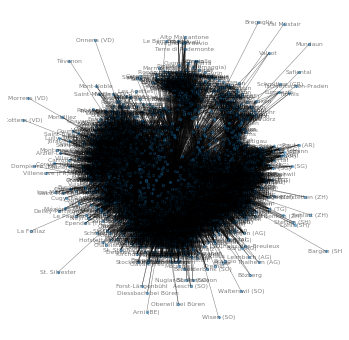

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [188]:
sg = next(g.subgraph(c) for c in nx.connected_components(g))
sg

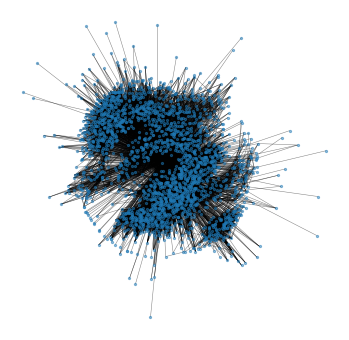

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [189]:
pos = {gemeinde: (v['long'], v['lat'])
       for gemeinde, v in
       gemeinden.to_dict('index').items()}

In [190]:
#grösse der nodes
deg = nx.degree(sg)
sizes = [5 * deg[gemeinde] for gemeinde in sg.nodes]

In [226]:
#labels der grössten pendlerzentren
labels = {gemeinde: gemeinde if deg[gemeinde] >= 200 else ''
          for gemeinde in sg.nodes}

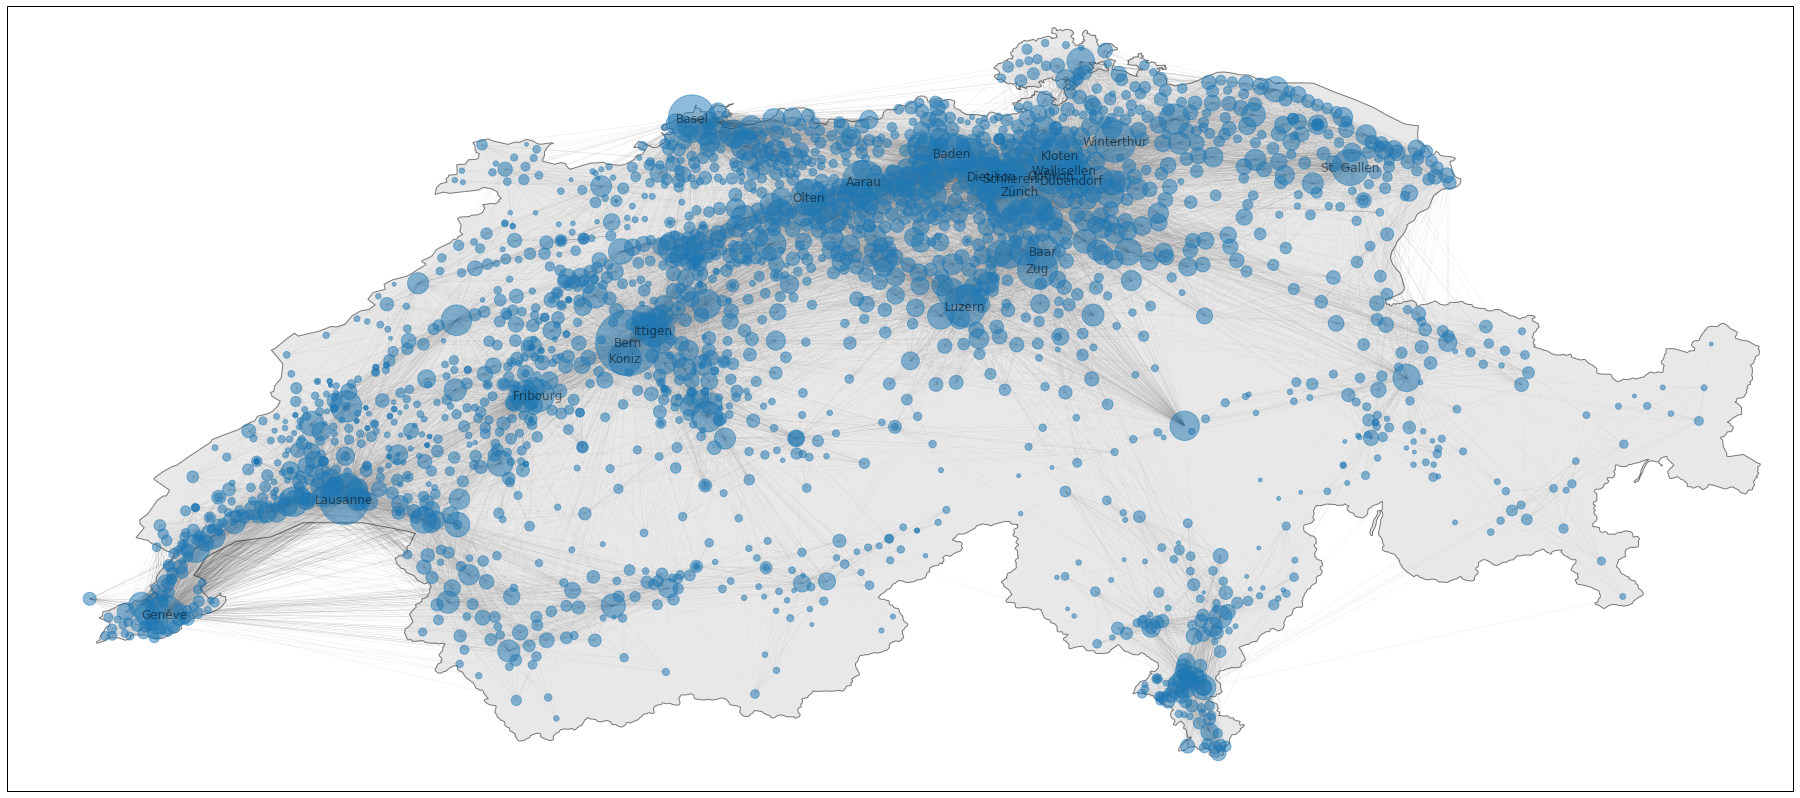

In [244]:
# Karte
latMin = gemeinden.lat.min()
latMax = gemeinden.lat.max()
longMax = gemeinden.long.max()
longMin = gemeinden.long.min()
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(32, 24),
    subplot_kw=dict(projection=crs))
ax.coastlines()
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='lightgray', alpha=0.5)
nx.draw_networkx(sg, ax=ax,
                 font_size=12,
                 alpha=.5,
                  width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 #node_color=altitude,
                 cmap=plt.cm.autumn)

In [245]:

plt.savefig("../Grafiken/PendlerstroemeNetzwerk.png")

<Figure size 432x288 with 0 Axes>